In [8]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import ssl
import certifi

# For macOS SSL Error
ssl._create_default_https_context = lambda: ssl.create_default_context(cafile=certifi.where())


In [9]:
# Data Acquisition 
# 1.1 Download the Dataset from UCI Repository
heart_disease = fetch_ucirepo(id=45)  # Heart Disease dataset

In [10]:
# 1.2 Convert dataset to DataFrame
X = heart_disease.data.features
y = heart_disease.data.targets
df = pd.concat([X, y], axis=1)

# Additionally saved the data in the form of a CSV File
df.to_csv("heart_disease.csv", index=False)
print("\nDataset saved as 'heart_disease_cleaned.csv'")


Dataset saved as 'heart_disease_cleaned.csv'


In [11]:
# 1.3 Display first and last five records
print("Displays first 5 Records:")
print(df.head())

print("\nDisplays last 5 Records:")
print(df.tail())

Displays first 5 Records:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  num  
0  0.0   6.0    0  
1  3.0   3.0    2  
2  2.0   7.0    1  
3  0.0   3.0    0  
4  0.0   3.0    0  

Displays last 5 Records:
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
298   45    1   1       110   264    0        0      132      0      1.2   
299   68    1   4       144   193    1        0      141      0      3.4   
300   57    1   4       130   131    0        0      115      1      1.2   
301   57    0   2       130   236    

In [12]:
# 1.4 Display column headings, statistical info, and description

# Shows the column headings
print("\nDisplay the Column Headings")
print(df.columns.tolist())

# Shows the Statistical Information (like count, mean, standard deviation, etc.)
print("\nStatistical Info:")
print(df.describe())

# Shows the Description of the Data (as in structure, meaning, distributing, types)
print("\nDescription of the data:")
print(heart_disease.variables)


Display the Column Headings
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

Statistical Info:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  30

In [13]:
# 1.5 Observations

# Shows No. of Features and Examples in the Dataset
print("\nObservations:")
print(f"Number of Features: {df.shape[1]}")
print(f"Number of Examples: {df.shape[0]}")

# Shows the Types of Data Attributes
print("Types of Attributes:")
print("Data Attributes\tType")
print(df.dtypes)
print(df.dtypes.value_counts())


Observations:
Number of Features: 14
Number of Examples: 303
Types of Attributes:
Data Attributes	Type
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
num           int64
dtype: object
int64      11
float64     3
Name: count, dtype: int64



Duplicate Data:
0

Missing Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

Unique values for categorical columns (to detect unexpected codes):
sex: [np.int64(0), np.int64(1)]
cp: [np.int64(1), np.int64(2), np.int64(3), np.int64(4)]
fbs: [np.int64(0), np.int64(1)]
restecg: [np.int64(0), np.int64(1), np.int64(2)]
exang: [np.int64(0), np.int64(1)]
slope: [np.int64(1), np.int64(2), np.int64(3)]
thal: [np.float64(3.0), np.float64(6.0), np.float64(7.0), np.float64(nan)]

Check for out-of-range numerical values (e.g., chol < 100 or > 600):
Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, num]
Index: []

BoxPlot


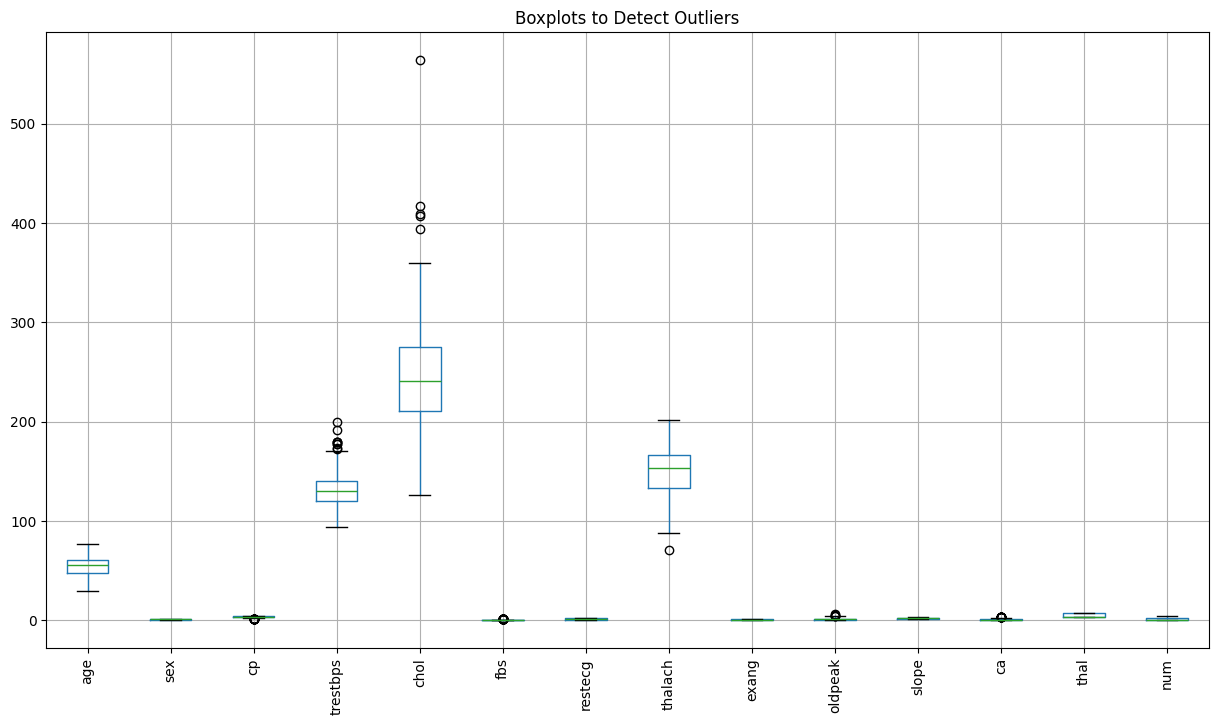

In [14]:
# 2.1 Check for duplicates, missing values, inconsistencies

categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
# Check for Duplicate Data
print("\nDuplicate Data:")
print(df.duplicated().sum())

# Check for Missing Values
print("\nMissing Values:")
print(df.isnull().sum())

# Check for inconsistent data (i.e. unexpected values in categorical and numeric columns)
print("\nUnique values for categorical columns (to detect unexpected codes):")
for col in categorical_cols:
    print(f"{col}: {sorted(df[col].unique())}")

print("\nCheck for out-of-range numerical values (e.g., chol < 100 or > 600):")
print(df[(df['chol'] < 100) | (df['chol'] > 600)])


# Check for outliers using boxplot
print("\nBoxPlot")
plt.figure(figsize=(15, 8))
df.select_dtypes(include='number').boxplot(rot=90)
plt.title("Boxplots to Detect Outliers")
plt.show()

In [15]:
# 2.2 Applying Techniques to remove duplicate, missing, inconsistent and outlier data

# Remove duplicate data (although from the above data it is clear that there is no duplicate data)
df = df.drop_duplicates()

# Drop missing data (will remove the thal one)
df = df.dropna()

# Outlier removal using IQR for all numeric columns (excluding categorical ones)

# To check for outliers — exclude encoded categorical columns if needed i.e. only numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Remove outliers for each column using IQR
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    before = df.shape[0]
    df = df[~((df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR))]
    after = df.shape[0]
    print(f"Removed {before - after} outliers from '{col}' using IQR method.")


Removed 0 outliers from 'age' using IQR method.
Removed 0 outliers from 'sex' using IQR method.
Removed 23 outliers from 'cp' using IQR method.
Removed 8 outliers from 'trestbps' using IQR method.
Removed 5 outliers from 'chol' using IQR method.
Removed 33 outliers from 'fbs' using IQR method.
Removed 0 outliers from 'restecg' using IQR method.
Removed 1 outliers from 'thalach' using IQR method.
Removed 0 outliers from 'exang' using IQR method.
Removed 4 outliers from 'oldpeak' using IQR method.
Removed 0 outliers from 'slope' using IQR method.
Removed 11 outliers from 'ca' using IQR method.
Removed 0 outliers from 'thal' using IQR method.
Removed 29 outliers from 'num' using IQR method.


In [16]:
# 2.3 Encode categorical variables

# Manually define categorical columns from the 1.4 chapter data (Description of the Data)
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

# Apply one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("\nOne-Hot Encoding applied to:", categorical_cols)



One-Hot Encoding applied to: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']


In [17]:
# 2.4 Observations
print("\nFinal Data Shape:", df.shape)
print("Duplicates removed, missing data dropped. Outliers removed using IQR.")
print("Encoding: One-hot encoding used for categorical features.")


Final Data Shape: (183, 17)
Duplicates removed, missing data dropped. Outliers removed using IQR.
Encoding: One-hot encoding used for categorical features.


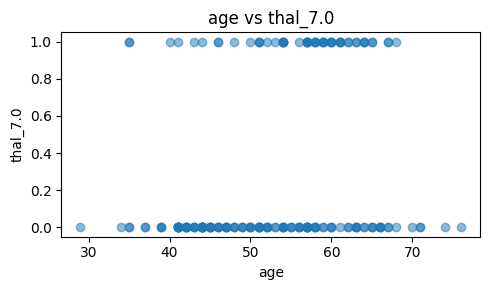

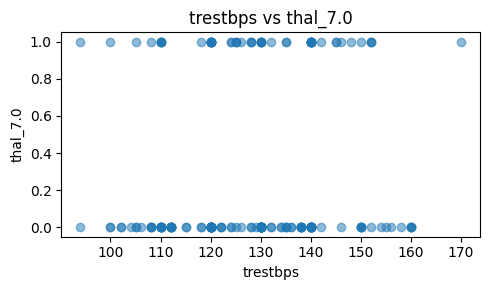

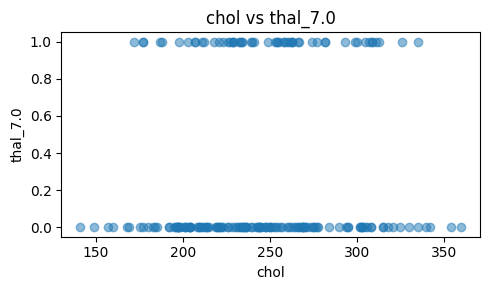

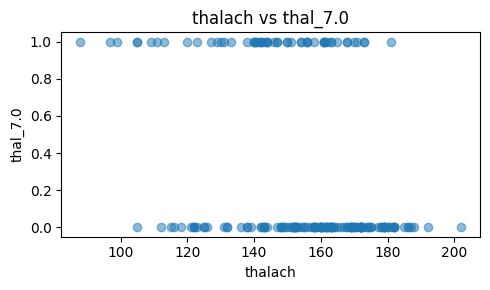

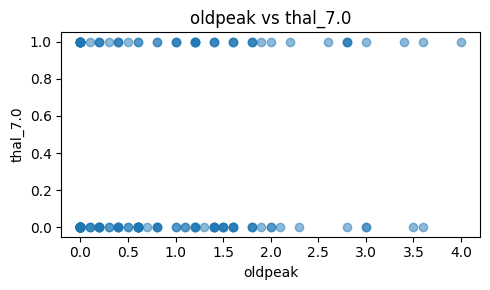

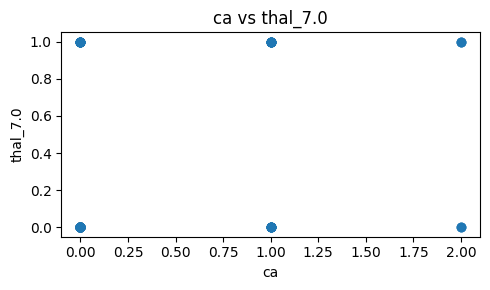

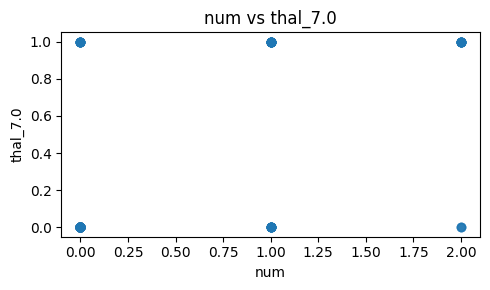

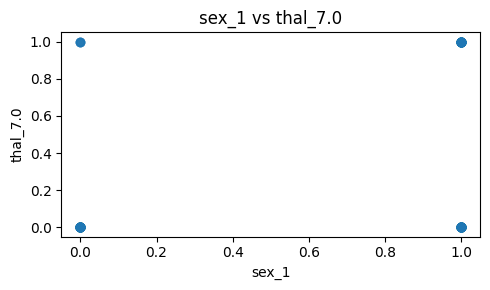

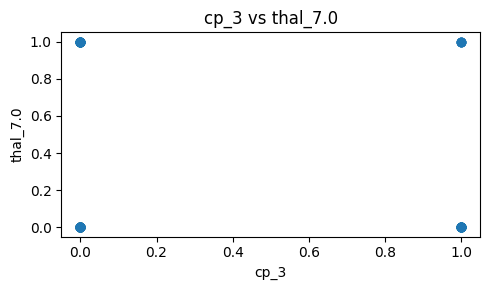

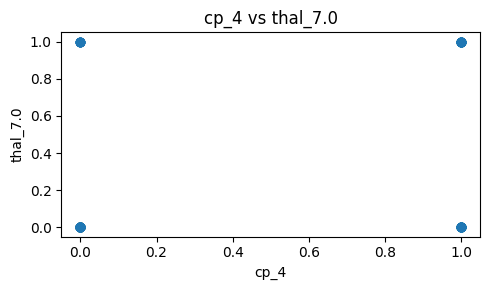

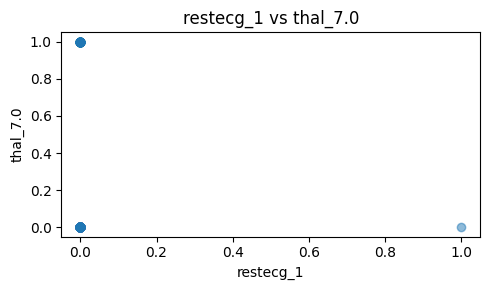

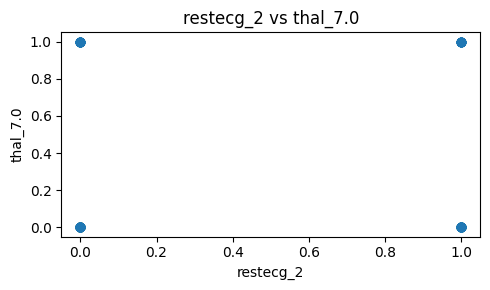

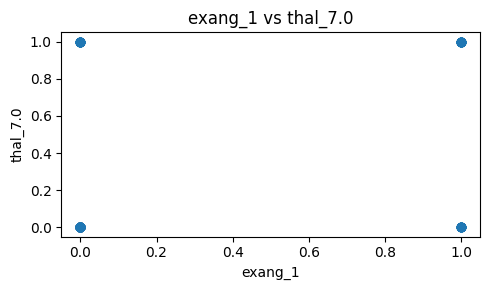

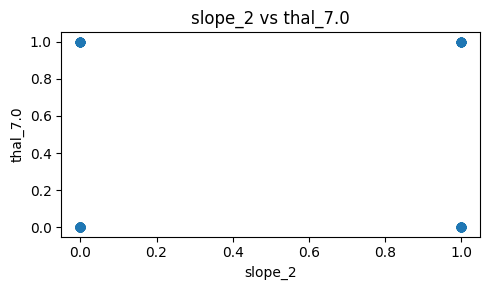

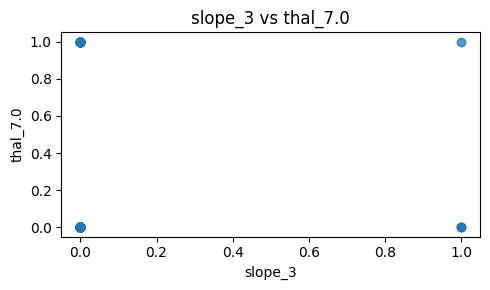

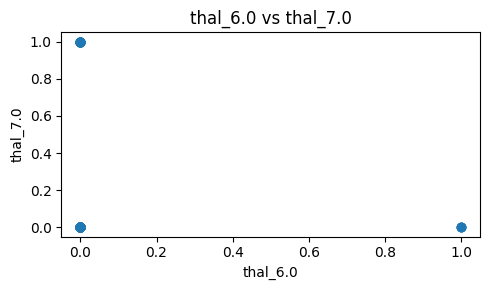

In [18]:
# 3.1 Scatter plots of features vs target
target = df.columns[-1]
for col in df.columns[:-1]:
    if pd.api.types.is_numeric_dtype(df[col]):
        plt.figure(figsize=(5, 3))
        plt.scatter(df[col], df[target], alpha=0.5)
        plt.title(f"{col} vs {target}")
        plt.xlabel(col)
        plt.ylabel(target)
        plt.tight_layout()
        plt.show()

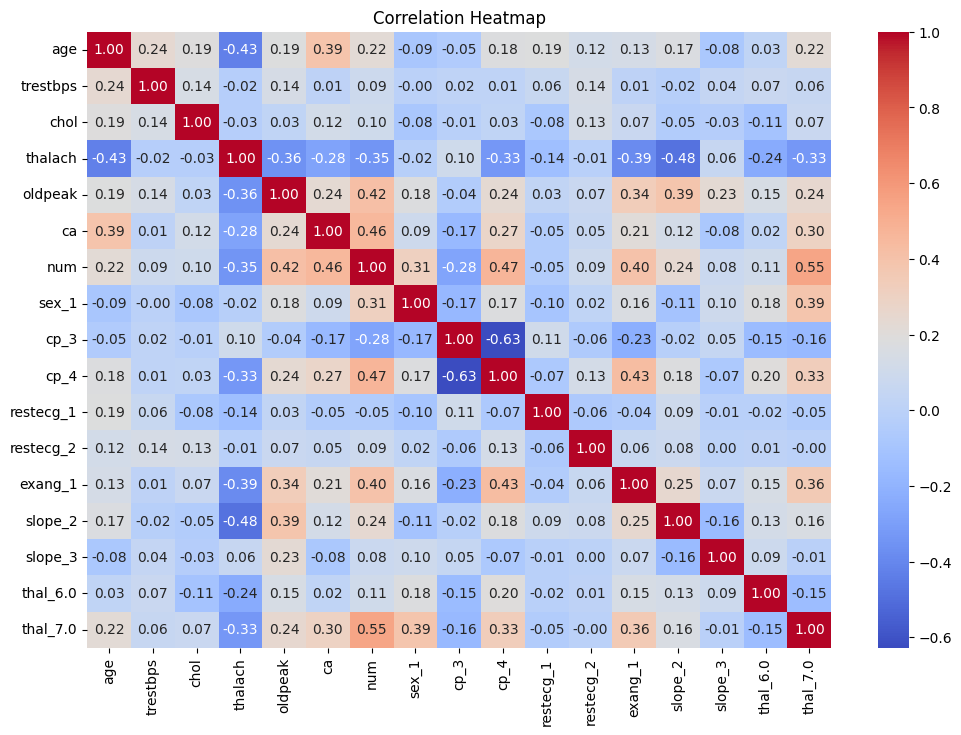

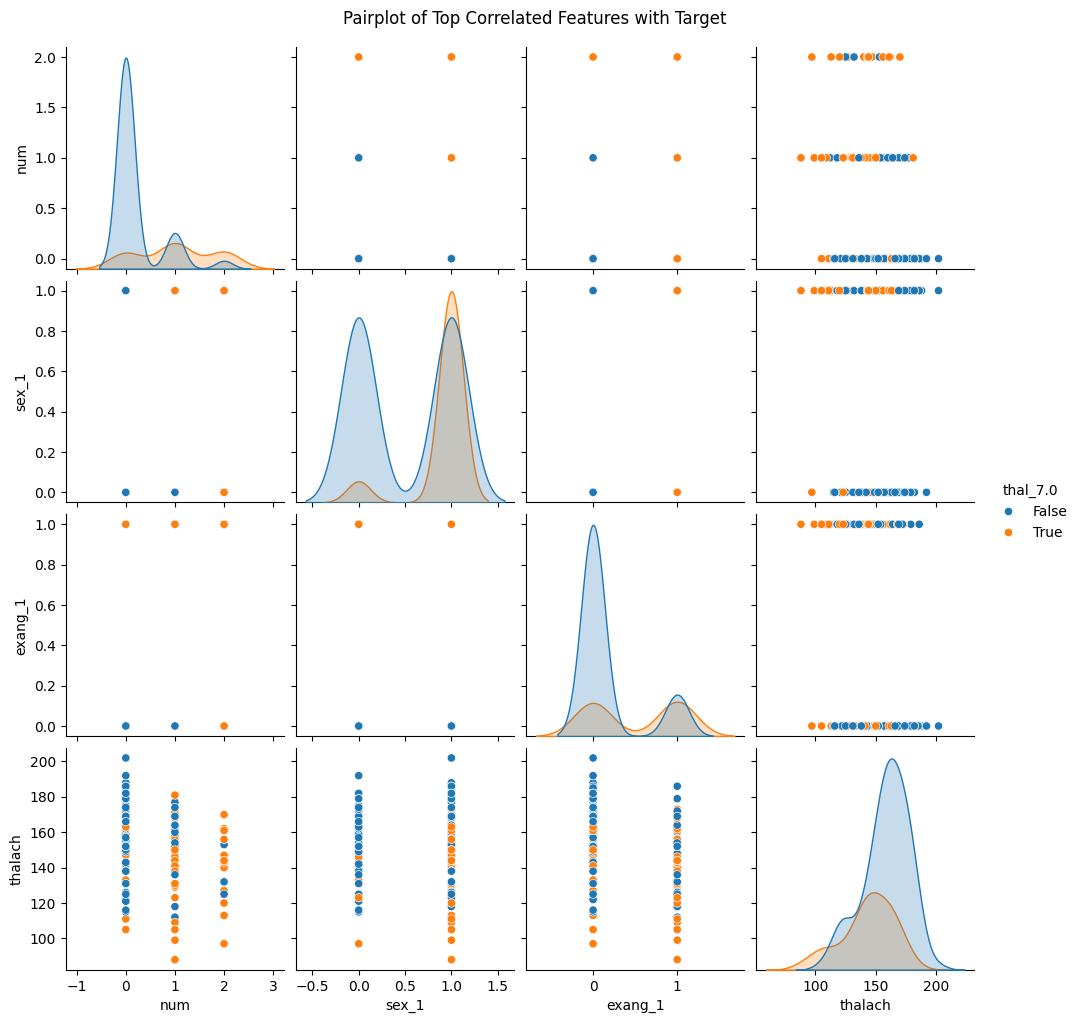

In [19]:
# 3.2 Heatmap and pairplot
corr = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

top_corr = corr[target].abs().sort_values(ascending=False).index[1:5].tolist()
sns.pairplot(df[top_corr + [target]], hue=target)
plt.suptitle("Pairplot of Top Correlated Features with Target", y=1.02)
plt.show()